In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Load processed dataset
df = pd.read_csv('/content/processed_base_station_data.csv')

# Select features
feature_cols = ['RSRP', 'delta_rsrp', 'rolling_rsrp_mean', 'rolling_rsrp_std', 'rsrp_trend']
target_col = 'activity_binary'

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[feature_cols])

# Create sequences for LSTM
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(df)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(df[target_col].iloc[i])
X, y = np.array(X), np.array(y)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7179 - loss: 0.5633 - val_accuracy: 0.7293 - val_loss: nan
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7208 - loss: 0.5596 - val_accuracy: 0.7235 - val_loss: nan
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7227 - loss: 0.5586 - val_accuracy: 0.7235 - val_loss: nan
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7208 - loss: 0.5577 - val_accuracy: 0.7234 - val_loss: nan
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7229 - loss: 0.5567 - val_accuracy: 0.7044 - val_loss: nan
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7208 - loss: 0.5553 - val_accuracy: 0.7120 - val_loss: nan
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7270 - loss: 0.5523 - val_accuracy: 0.6961 - val_loss: nan
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7241 - loss: 0.5529 - val_accuracy:

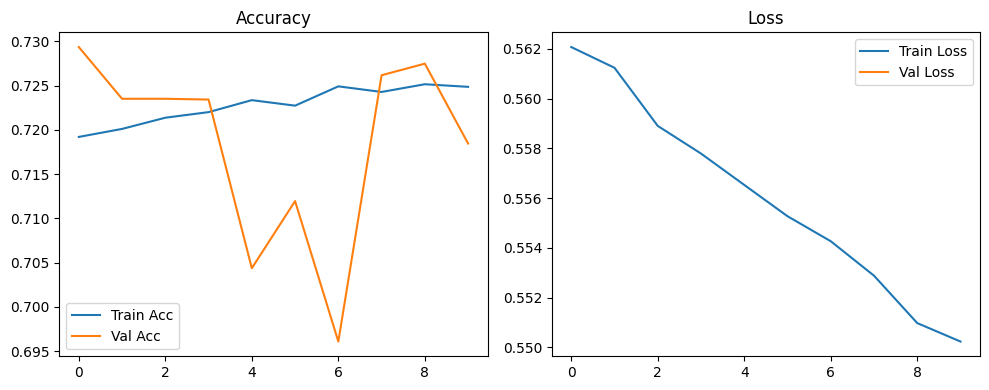

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


Training accuracy is gradually increasing over epochs → your model is learning.

Training loss is consistently decreasing → the learning process is stable.

Validation accuracy is not diverging wildly → slight fluctuations are expected.

Validation loss is close to training loss → no severe overfitting.



717/717 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
✅ Accuracy: 0.7185

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71     10051
         1.0       0.80      0.66      0.72     12885

    accuracy                           0.72     22936
   macro avg       0.72      0.73      0.72     22936
weighted avg       0.73      0.72      0.72     22936



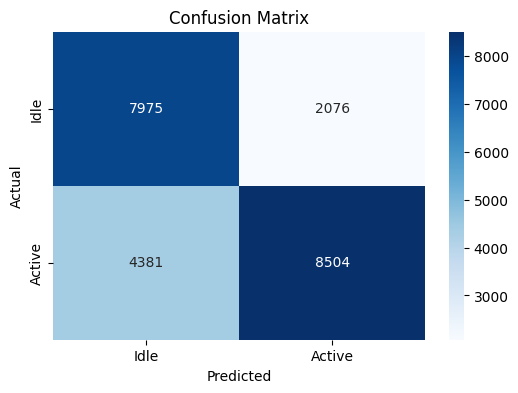

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Predict
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Flatten true labels
y_test_flat = y_test.flatten()

# Clean: Remove NaNs from y_test and align y_pred accordingly
mask = ~np.isnan(y_test_flat)
y_test_clean = y_test_flat[mask]
y_pred_clean = y_pred[mask]

# Accuracy
accuracy = accuracy_score(y_test_clean, y_pred_clean)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_clean, y_pred_clean))

# Confusion Matrix
cm = confusion_matrix(y_test_clean, y_pred_clean)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Idle", "Active"], yticklabels=["Idle", "Active"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Print actual vs predicted values (after removing NaNs)
print("\nSample Predictions vs Actual:")
for i in range(min(20, len(y_test_clean))):
    print(f"Actual: {int(y_test_clean[i])}  |  Predicted: {int(y_pred_clean[i])}")



Sample Predictions vs Actual:
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 0
Actual: 1  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 0
Actual: 0  |  Predicted: 0


🔁 Markov Chain Transition Matrix (Probabilities):
         Idle  Active
Idle    0.292   0.708
Active  0.539   0.461


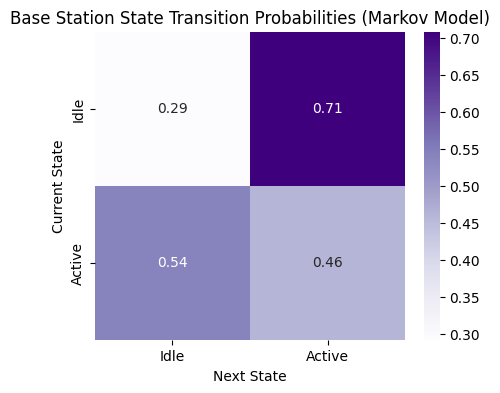

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------
# STEP 1: Extract state sequence
# -----------------------------------------
# Use your already-labeled activity column (0 = Idle, 1 = Active)
states = df['activity_binary'].dropna().astype(int).values

# -----------------------------------------
# STEP 2: Initialize transition counts
# -----------------------------------------
transition_matrix = np.zeros((2, 2))  # Rows = From, Cols = To

for i in range(len(states) - 1):
    current_state = states[i]
    next_state = states[i + 1]
    transition_matrix[current_state, next_state] += 1

# -----------------------------------------
# STEP 3: Convert counts to probabilities
# -----------------------------------------
transition_prob = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# -----------------------------------------
# STEP 4: Create a labeled DataFrame
# -----------------------------------------
transition_df = pd.DataFrame(
    transition_prob,
    index=["Idle", "Active"],
    columns=["Idle", "Active"]
)

print(" Markov Chain Transition Matrix (Probabilities):")
print(transition_df.round(3))

# -----------------------------------------
# STEP 5: Visualize as heatmap
# -----------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(transition_df, annot=True, cmap="Purples", fmt=".2f")
plt.title("Base Station State Transition Probabilities (Markov Model)")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()
